In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from matplotlib.ticker import MaxNLocator

In [2]:
df = pd.read_csv("shark_attacks_cleaned.csv")

In [3]:
df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href
0,2017.06.11,2017-11-06,2017.0,Unprovoked,Australia,Western Australia,"Point Casuarina, Bunbury",Body Boarding,Paul Goff,M,48.0,"No injury, board bitten",N,08h30,"White Shark, 4 M","WA Today, 6/11/2017",2017.06.11-Goff.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...
1,2017.06.10.b,2017-10-06,2017.0,Unprovoked,Australia,Victoria,"Flinders, Mornington Penisula",Surfing,female,F,24.0,"No injury, knocke off board",N,15h45,7 Gill Shark,NaN,2017.06.10.b-Flinders.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...
2,2017.06.10.a,2017-10-06,2017.0,Unprovoked,Usa,Florida,"Ponce Inlet, Volusia County",Surfing,Bryan Brock,M,19.0,Laceration to left foot,N,10h00,Nan,"Daytona Beach News-Journal, 6/10/2017",2017.06.10.a-Brock.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...
3,2017.06.04,2017-04-06,2017.0,Unprovoked,Usa,Florida,"Middle Sambo Reef Off Boca Chica, Monroe County",Spearfishing,Parker Simpson,M,24.0,Laceration to shin,N,NaN,8' Shark,"Nine News, 6/7/2017",2017.06.04-Simpson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...
4,2017.06.02,2017-02-06,2017.0,Unprovoked,Bahamas,New Providence,Athol Island,Snorkeling,Tiffany Johnson,F,32.0,Right forearm severed,N,Shortly before 12h00,Tiger Shark,"Tribune 242, 6/2/2017",2017.06.02-Johnson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...


"⭐ Objective1: Data Cleaning and Preparation"

In [4]:
print("🔍 EXPLORATORY DATA ANALYSIS: \n")

🔍 EXPLORATORY DATA ANALYSIS: 



In [5]:
print("✅ Shape of Cleaned Dataset:", df.shape)

✅ Shape of Cleaned Dataset: (2132, 18)


In [6]:
print("\n🎯 Columns:\n", df.columns.tolist())


🎯 Columns:
 ['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location', 'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatal (Y/N)', 'Time', 'Species', 'Investigator or Source', 'pdf', 'href']


In [7]:
print("\n📊 Data Types:\n", df.dtypes)


📊 Data Types:
 Case Number                object
Date                       object
Year                      float64
Type                       object
Country                    object
Area                       object
Location                   object
Activity                   object
Name                       object
Sex                        object
Age                       float64
Injury                     object
Fatal (Y/N)                object
Time                       object
Species                    object
Investigator or Source     object
pdf                        object
href                       object
dtype: object


In [8]:
print("\n📌 Missing Values:\n", df.isnull().sum())


📌 Missing Values:
 Case Number                  0
Date                         0
Year                         0
Type                         0
Country                      0
Area                        98
Location                     0
Activity                     0
Name                        63
Sex                        224
Age                          0
Injury                      10
Fatal (Y/N)                  2
Time                      1059
Species                      0
Investigator or Source       8
pdf                          0
href                         0
dtype: int64


In [9]:
print("\n📋 Unique Activities:\n", df['Activity'].value_counts().head(10))


📋 Unique Activities:
 Activity
Surfing         353
Swimming        271
Nan             176
Fishing         152
Spearfishing    150
Wading           56
Diving           44
Standing         38
Snorkeling       30
Bathing          28
Name: count, dtype: int64


In [10]:
print("\n🌍 Top Countries:\n", df['Country'].value_counts().head(10))



🌍 Top Countries:
 Country
Usa                 770
Australia           452
South Africa        208
Papua New Guinea     76
Brazil               47
Bahamas              42
New Zealand          40
New Caledonia        28
Mexico               28
Reunion              21
Name: count, dtype: int64


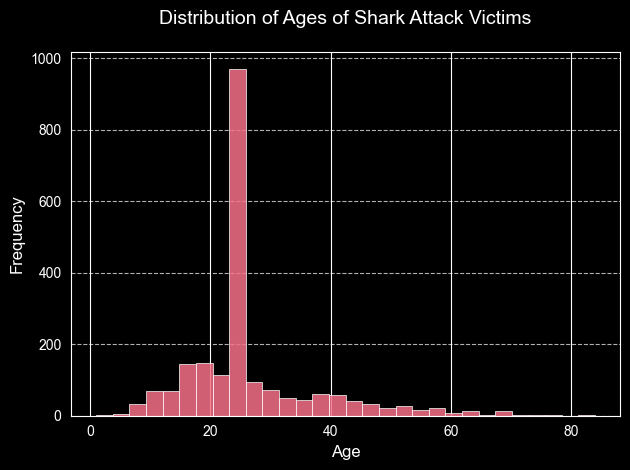

In [11]:
# Histogram
sns.set_style("whitegrid")
plt.style.use('dark_background')

sns.set_palette("husl")

ax = sns.histplot(df['Age'], bins=30, edgecolor='white', linewidth=0.5, alpha=0.85)
plt.title('Distribution of Ages of Shark Attack Victims', fontsize=14, pad=20)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

"⭐ Objective 2: Temporal Analysis"

In [12]:
# Analyze trends in shark attacks over time to identify patterns or anomalies.

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=['Date'])

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

sns.set_style("whitegrid")
plt.style.use('dark_background')

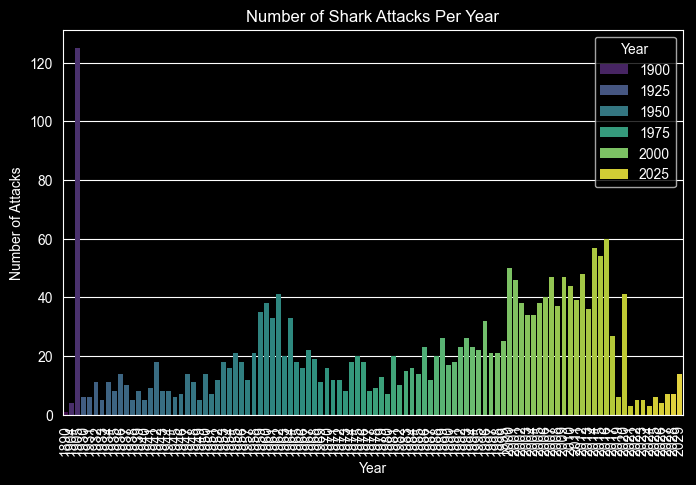

In [13]:
# Attacks per year
plt.figure(figsize=(8, 5))
sns.countplot(x='Year', data=df, hue='Year', palette='viridis', edgecolor='none')
plt.title('Number of Shark Attacks Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=90)
plt.show()

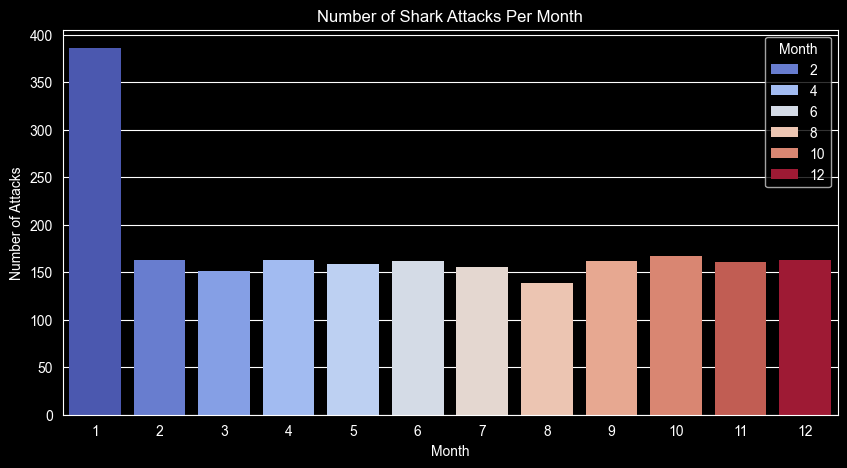

In [14]:
# Attacks per month
plt.figure(figsize=(10, 5))
sns.countplot(x='Month', data=df, hue='Month', palette='coolwarm', edgecolor='none')
plt.title('Number of Shark Attacks Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Attacks')
plt.show()

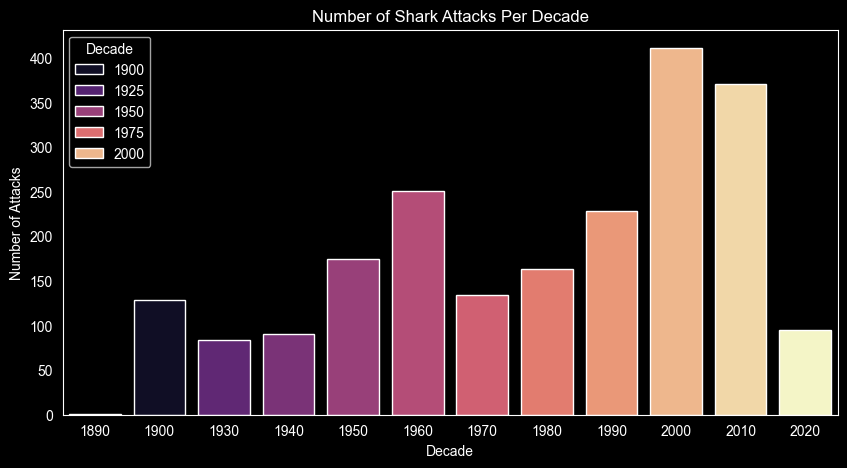

In [15]:
# Decade
df['Decade'] = (df['Year'] // 10) * 10

plt.figure(figsize=(10, 5))
sns.countplot(x='Decade', data=df, hue='Decade', palette='magma', edgecolor='white')
plt.title('Number of Shark Attacks Per Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Attacks')
plt.grid(False)
plt.show()

Year
1905    125
2014     57
2016     60
dtype: int64


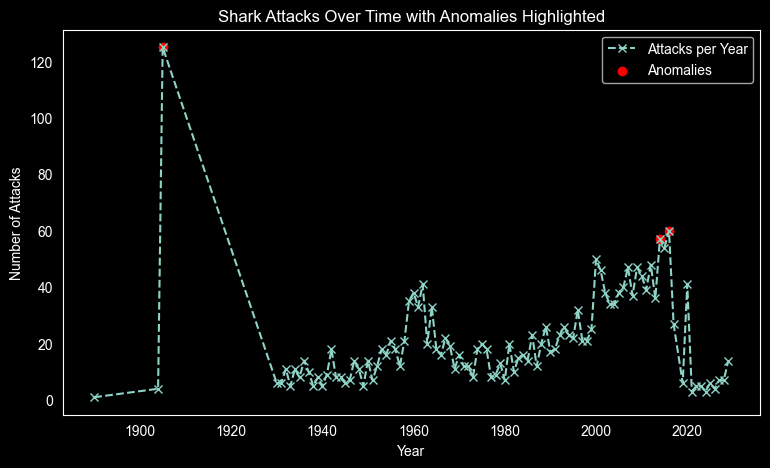

In [16]:
# Anomalies
yearly_attacks = df.groupby('Year').size()
mean_attacks = yearly_attacks.mean()
std_attacks = yearly_attacks.std()
anomalies = yearly_attacks[(yearly_attacks - mean_attacks).abs() > 2 * std_attacks]
print(anomalies)

plt.figure(figsize=(9, 5))
plt.plot(yearly_attacks.index, yearly_attacks.values, marker='x', linestyle='--', label='Attacks per Year')
plt.scatter(anomalies.index, anomalies.values, color='red', label='Anomalies')
plt.title('Shark Attacks Over Time with Anomalies Highlighted')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.legend()
plt.grid(False)
plt.show()

warnings.filterwarnings("ignore")

"⭐ Objective 3: Geospatial Analysis"

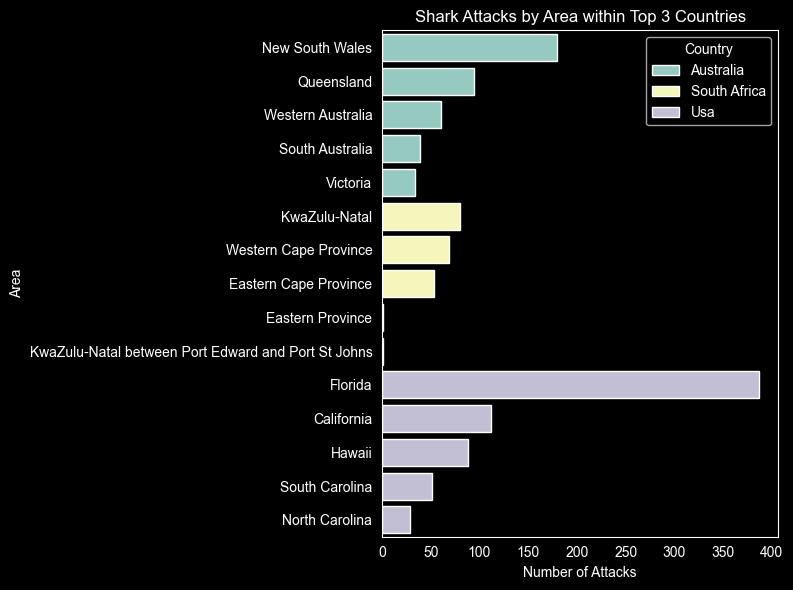

In [17]:
# Visualize the geographical distribution of shark attacks to identify high-risk areas.

top_countries = df['Country'].value_counts().head(3).index
df_top = df[df['Country'].isin(top_countries)]

grouped = df_top.groupby(['Country', 'Area']).size().reset_index(name='Count')
grouped = grouped.groupby('Country').apply(lambda x: x.nlargest(5, 'Count')).reset_index(drop=True)

plt.figure(figsize=(8, 6))
sns.barplot(y='Area', x='Count', hue='Country', data=grouped)
plt.title('Shark Attacks by Area within Top 3 Countries')
plt.xlabel('Number of Attacks')
plt.ylabel('Area')
plt.tight_layout()
plt.grid(False)
plt.show()

In [18]:
top_countries = df['Country'].value_counts().head(3).index
df_top = df[df['Country'].isin(top_countries)]

In [19]:
grouped = df_top.groupby(['Country', 'Area']).size().reset_index(name='Count')
low_risk_grouped = grouped.groupby('Country').apply(lambda x: x.nsmallest(5, 'Count')).reset_index(drop=True)

low_risk_grouped['Label'] = low_risk_grouped['Country'] + ' | ' + low_risk_grouped['Area']
low_risk_grouped = low_risk_grouped.sort_values(by='Count', ascending=True)

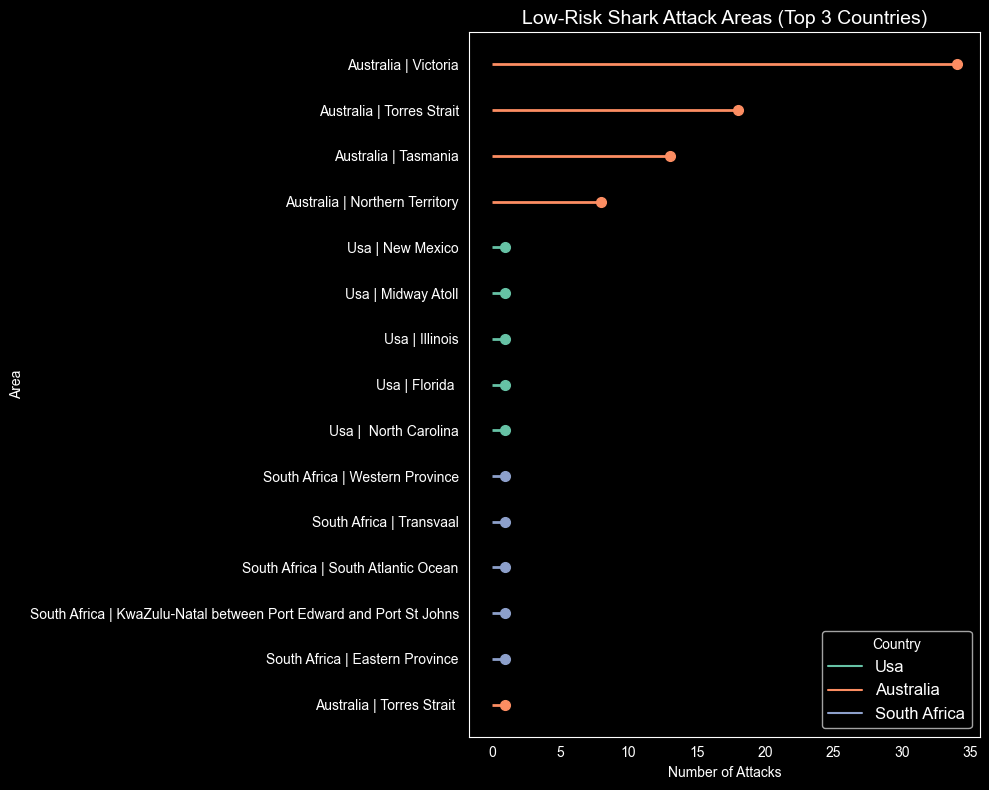

In [20]:
plt.figure(figsize=(10, 8))
colors = sns.color_palette("Set2", n_colors=len(top_countries))
country_color = dict(zip(top_countries, colors))

for _, row in low_risk_grouped.iterrows():
    plt.hlines(y=row['Label'], xmin=0, xmax=row['Count'], color=country_color[row['Country']], linewidth=2)
    plt.plot(row['Count'], row['Label'], "o", markersize=7, color=country_color[row['Country']])

for country in top_countries:
    plt.plot([], [], color=country_color[country], label=country)
plt.legend(title='Country')

plt.title('Low-Risk Shark Attack Areas (Top 3 Countries)', fontsize=14)
plt.xlabel('Number of Attacks')
plt.ylabel('Area')
plt.tight_layout()
plt.legend(title='Country', loc='lower right', fontsize=12)
plt.grid(False)
plt.show()

"⭐ Objective 4: Yearly and Global Trend Analysis"

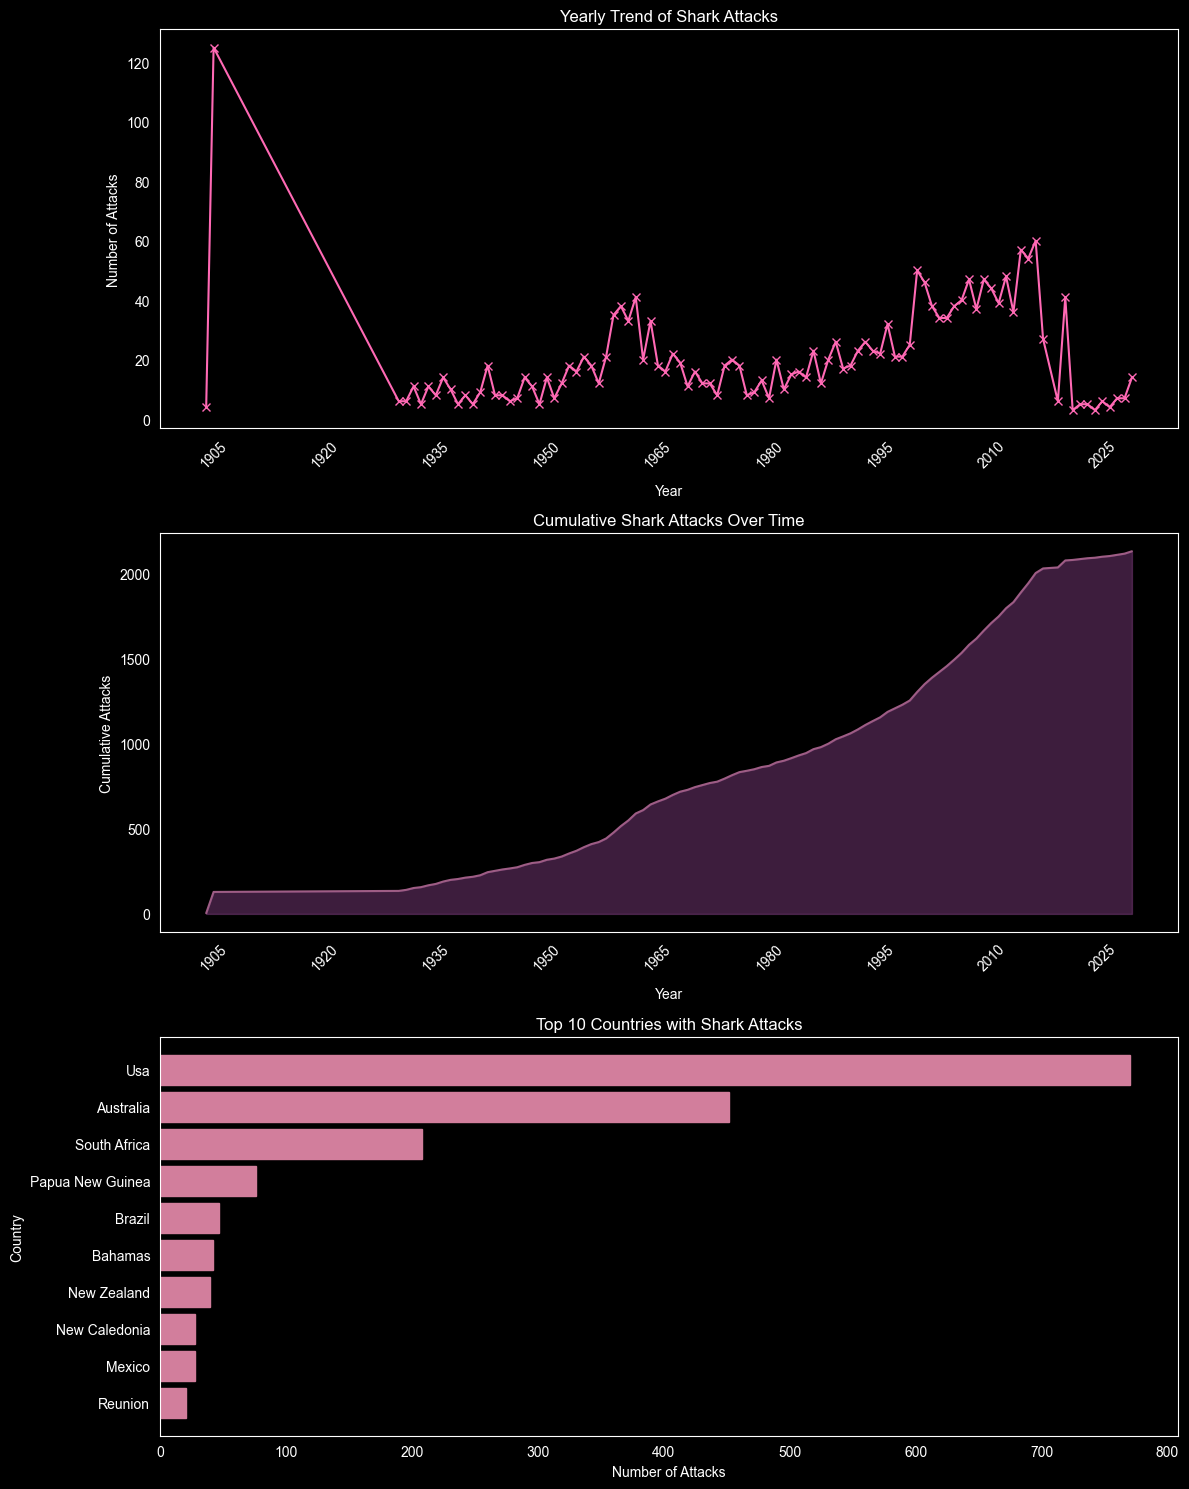

In [22]:
# Analyzing how shark attack incidents have evolved over time and identifying countries most affected globally.

plt.style.use('dark_background')
# sns.set_style("darkgrid")

df_copy = df.copy()  

df_filtered = df_copy[['Year', 'Country']]

df_filtered = df_filtered[df_filtered['Year'].apply(lambda x: str(x).isdigit())]
df_filtered['Year'] = df_filtered['Year'].astype(int)

df_filtered = df_filtered[df_filtered['Year'] > 1900]

df_filtered = df_filtered.dropna(subset=['Country'])

attacks_per_year = df_filtered['Year'].value_counts().sort_index()
cumulative_attacks = attacks_per_year.cumsum()

top_countries = df_filtered['Country'].value_counts().head(10)

plt.style.use('dark_background')
fig, axs = plt.subplots(3, 1, figsize=(12, 15))
plt.subplots_adjust(hspace=0.4)
fig.subplots_adjust(bottom=0.1)

# Yearly trend plot
axs[0].plot(attacks_per_year.index, attacks_per_year.values, marker='x', color='hotpink')
axs[0].set_title('Yearly Trend of Shark Attacks')
axs[0].set_xlabel('Year', labelpad=10)
axs[0].set_ylabel('Number of Attacks')
axs[0].grid(False)
axs[0].xaxis.set_major_locator(MaxNLocator(integer=True, nbins=10))
axs[0].tick_params(axis='x', rotation=45)

# Cumulative attacks plot
axs[1].fill_between(cumulative_attacks.index, cumulative_attacks.values, color='#7A3B7B', alpha=0.5)
axs[1].plot(cumulative_attacks.index, cumulative_attacks.values, color='#9E5D85')
axs[1].set_title('Cumulative Shark Attacks Over Time')
axs[1].set_xlabel('Year', labelpad=10)
axs[1].set_ylabel('Cumulative Attacks')
axs[1].grid(False)
axs[1].xaxis.set_major_locator(MaxNLocator(integer=True, nbins=10))
axs[1].tick_params(axis='x', rotation=45)

# Top countries plot
axs[2].barh(top_countries.index[::-1], top_countries.values[::-1], color='#D27E9C', edgecolor="#D27E9C")
axs[2].set_title('Top 10 Countries with Shark Attacks')
axs[2].set_xlabel('Number of Attacks')
axs[2].set_ylabel('Country')
axs[2].grid(False)

plt.tight_layout()
plt.show()


"⭐ Objective5: Fatality Distribution and Impact"

In [23]:
# Analyzing the severity and demographic impact of fatal vs non-fatal incidents.

df.columns = df.columns.str.strip()  
df.rename(columns={'Fatal (Y/N)': 'Fatal'}, inplace=True)
df['Fatal'] = df['Fatal'].str.upper().str.strip()

df['Fatal'] = df['Fatal'].replace({'UNKNOWN': 'N', '2017': 'N'})  # Replacing with 'N' (Non-Fatal)

df = df[df['Fatal'].isin(['Y', 'N'])]

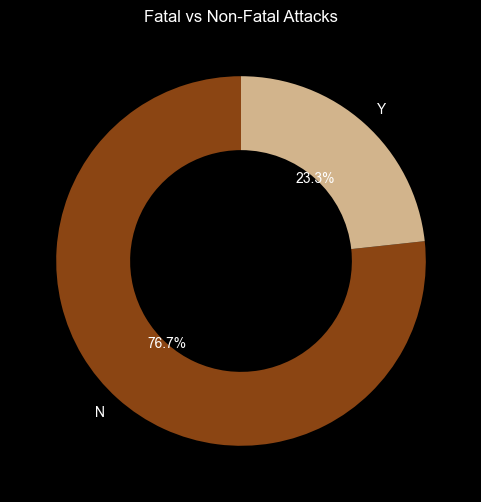

In [24]:
# --- 1. Donut Chart: Fatal vs Non-Fatal ---
fatal_counts = df['Fatal'].value_counts()

# Plot the donut chart
plt.figure(figsize=(6, 6))
colors=['#8B4513', '#D2B48C']
plt.pie(fatal_counts, labels=fatal_counts.index, 
        autopct='%1.1f%%', startangle=90,
        colors=colors, wedgeprops=dict(width=0.4, edgecolor='none'))
plt.title('Fatal vs Non-Fatal Attacks')
plt.show()

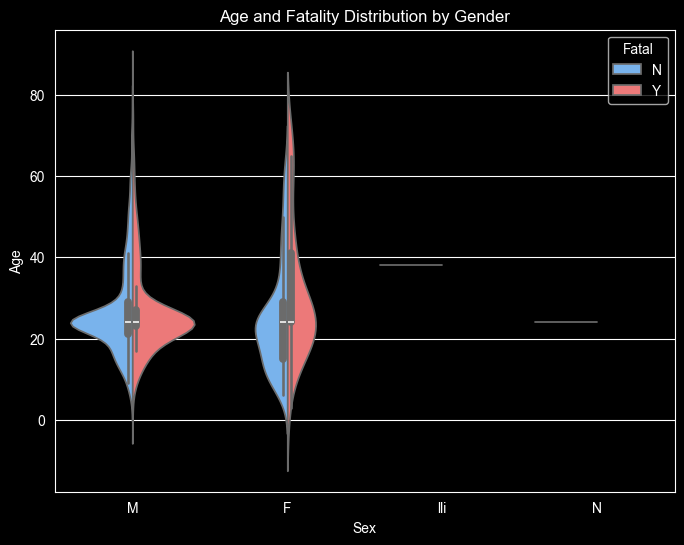

In [25]:
# --- 2. Violin Plot: Age and Fatality Distribution by Gender ---
df_violin = df[['Age', 'Sex', 'Fatal']].dropna()
df_violin['Age'] = pd.to_numeric(df_violin['Age'], errors='coerce')
df_violin = df_violin.dropna()

# Plot violin plot for Age and Fatality by Gender
plt.figure(figsize=(8, 6))
sns.violinplot(x='Sex', y='Age', hue='Fatal', data=df_violin, 
            split=True,palette={'Y': '#ff6666', 'N': '#66b3ff'})
plt.title('Age and Fatality Distribution by Gender')
plt.show()

"⭐ Objective6: Demographic and Fatality Analysis"

In [26]:
# Analyze the relationship between age, year, and gender with the fatality status of shark attacks to identify demographic patterns influencing attack outcomes.

df['Fatal'] = df['Fatal'].map({'Y': 1, 'N': 0})

subset_df = df[['Age', 'Year', 'Fatal']].dropna()

correlation_matrix = subset_df.corr()
correlation_matrix_copy = correlation_matrix.copy()

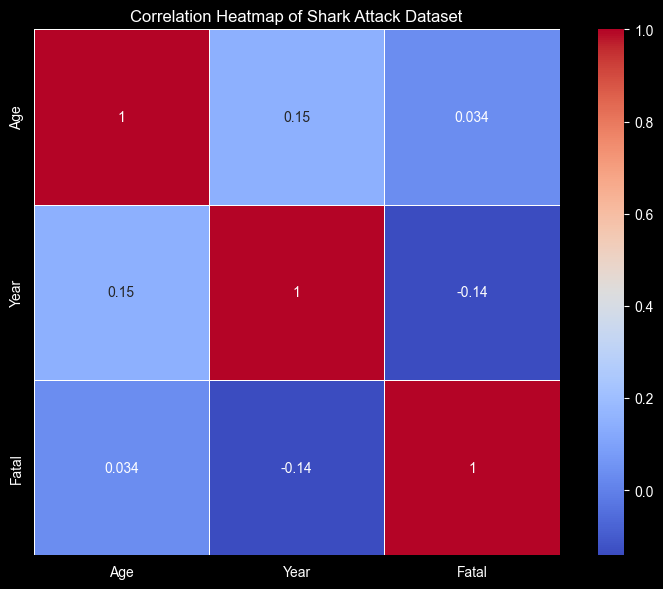

In [27]:
# Heat Map
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, square=True)
plt.title('Correlation Heatmap of Shark Attack Dataset')
plt.tight_layout()
plt.show()

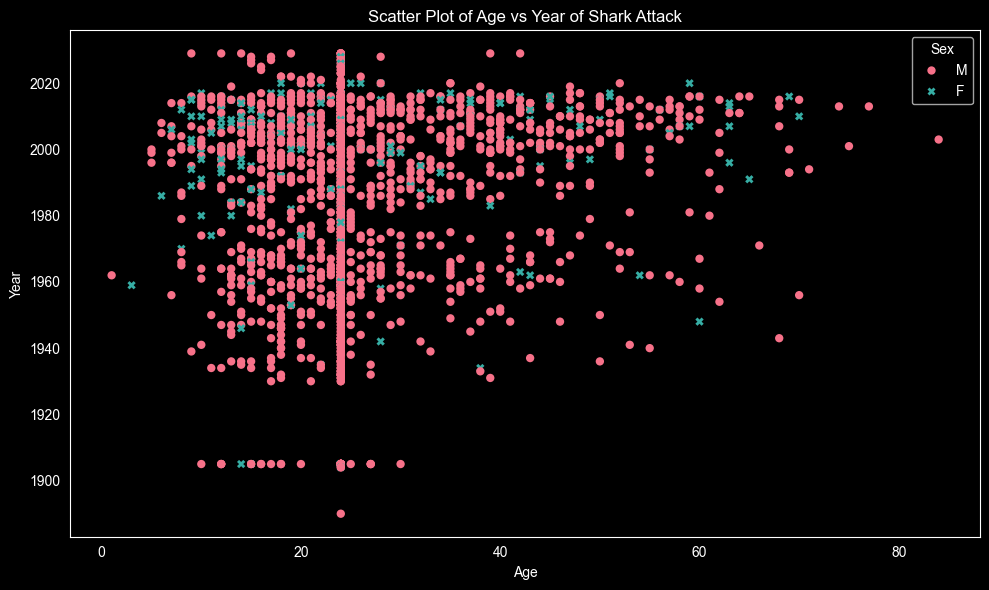

In [28]:
# Scatter Plot
df['Sex'] = df['Sex'].replace(['N', 'lli'], np.nan)  

df = df.dropna(subset=['Sex'])

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Year', hue='Sex', palette='husl', style='Sex', markers={'M': 'o', 'F': 'X'}, edgecolor='none')
plt.title('Scatter Plot of Age vs Year of Shark Attack')
plt.xlabel('Age')
plt.ylabel('Year')
plt.tight_layout()
plt.grid(False)
plt.show()

"⭐ Objective7: Outlier Detection in Numerical Data"

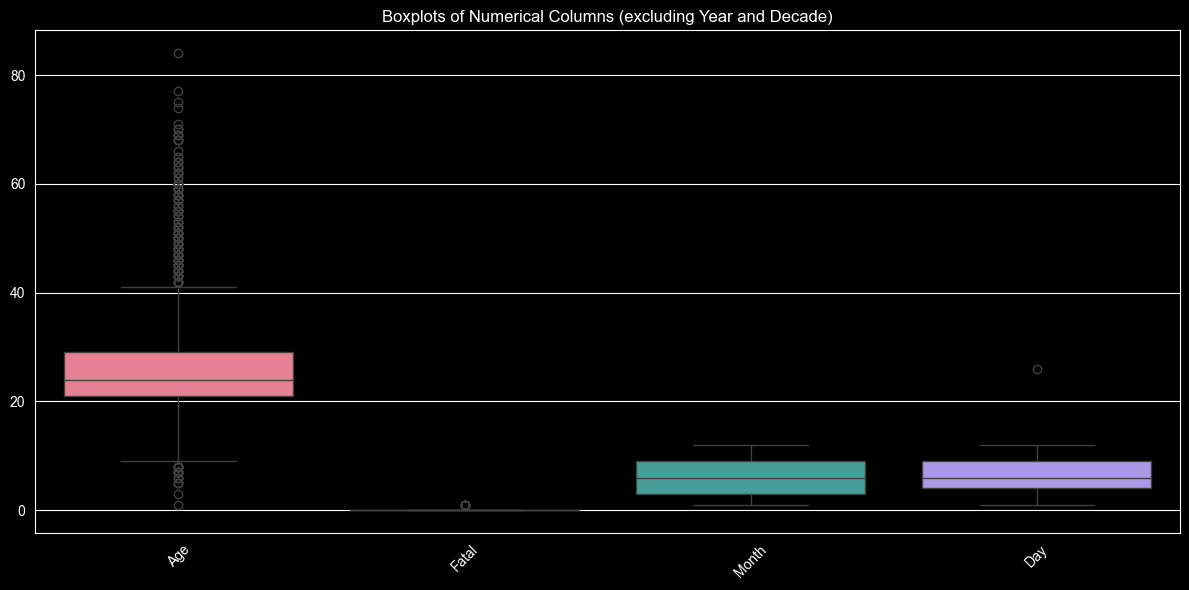

In [29]:
# Identifying anomalies in columns like Age and Year to improve data accuracy and analytical insights.

numeric_cols = df.select_dtypes(include='number').drop(['Year', 'Decade'], axis=1)

# Plot boxplots for each numeric column
plt.figure(figsize=(12, 6))
sns.boxplot(data=numeric_cols, palette='husl')
plt.title('Boxplots of Numerical Columns (excluding Year and Decade)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

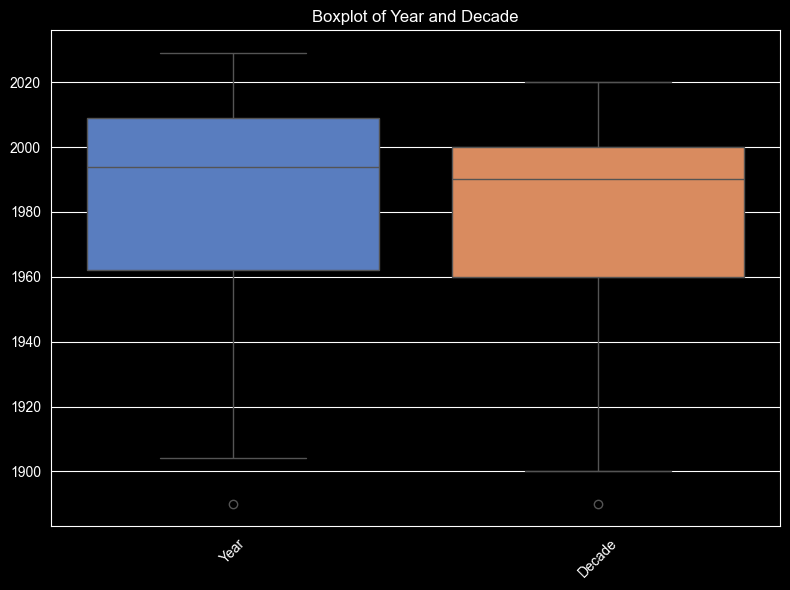

In [30]:
year_decade_df = df[['Year', 'Decade']]

# Plot combined boxplot for 'Year' and 'Decade'
plt.figure(figsize=(8, 6))
sns.boxplot(data=year_decade_df, palette='muted')
plt.title('Boxplot of Year and Decade')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
